# Imports

In [13]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from uta_gms import read_csv, uta_gms, Criterion

# Read data

In [14]:
df, CRITERIA = read_csv("data/s2.csv")
print(CRITERIA)
df

[Criterion(name='g1', type=True, points=2), Criterion(name='g2', type=True, points=2), Criterion(name='g3', type=True, points=2), Criterion(name='g4', type=True, points=2), Criterion(name='g5', type=True, points=2)]


,g1,g2,g3,g4,g5
a01,-18342,-30.7,-37.2,2.33,3.00
a02,-15335,-30.2,-41.6,2.00,2.50
a03,-16973,-29.0,-34.9,2.66,2.50
a04,-15460,-30.4,-35.8,1.66,1.50
a05,-15131,-29.7,-35.6,1.66,1.75
a06,-13841,-30.8,-36.5,1.33,2.00
a07,-18971,-28.0,-35.6,2.33,2.00
a08,-18319,-28.9,-35.3,1.66,2.00
a09,-19800,-29.4,-34.7,2.00,1.75
a10,-16966,-30.0,-37.7,2.33,3.25


In [15]:
PREFERENCES = [
    ('a08', 'a09'),
    ('a10', 'a03')
]
CRITERIA = [
    Criterion('g1', False, 0),
    Criterion('g2', False, 2),
    Criterion('g3', False, 3),
    Criterion('g4', True, 4),
    Criterion('g5', True, 4)
]

# Original dataset

In [16]:
df_relations = uta_gms(df, PREFERENCES, CRITERIA)
df_relations = df_relations[df_relations == 1].fillna(0)
print(df_relations.sum().sum())
df_relations

62.0


,a01,a02,a03,a04,a05,a06,a07,a08,a09,a10,a11,a12,a13,a14
a01,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
a02,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
a03,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
a04,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
a05,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
a06,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
a07,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
a08,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
a09,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
a10,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


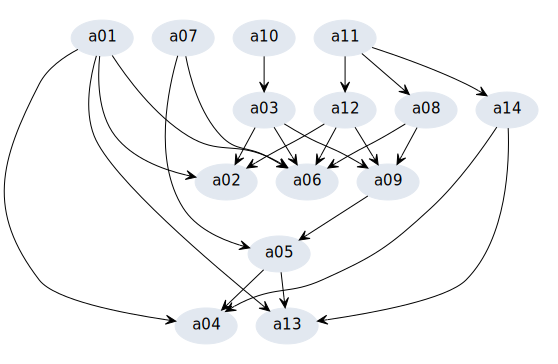

In [17]:
from hassediagram.hasse_diagram import hasse_graphviz
hasse_graphviz(df_relations.values, df.index)

# PCA

In [22]:
N_COMPONENTS = 4

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
pca = PCA(n_components=N_COMPONENTS)
df_pca = pd.DataFrame(pca.fit_transform(df_scaled), index=df.index, columns=range(N_COMPONENTS))
print(pca.explained_variance_ratio_)
df_pca

[0.44298066 0.31153263 0.13645018 0.07131461]


,0,1,2,3
a01,0.243925,1.773592,-0.274812,-1.287388
a02,-1.676446,2.325448,-1.242498,1.150465
a03,1.638356,0.394646,1.033866,0.158903
a04,-1.797365,-0.963997,0.417284,-0.195425
a05,-1.254374,-0.929392,0.684938,0.370020
a06,-2.805310,-0.210164,0.760785,-0.158486
a07,1.928345,-0.871992,-0.319262,0.875852
a08,0.246307,-1.315961,-0.272258,0.131712
a09,0.756357,-1.417312,-0.485616,-0.724311
a10,0.405999,2.130835,0.099202,-0.288134


In [23]:
CRITERIA = [Criterion(name, points=2) for name in df_pca.columns]
df_relations_pca = uta_gms(df_pca, PREFERENCES, CRITERIA)
df_relations_pca = df_relations_pca[df_relations_pca == 1].fillna(0)
print(df_relations_pca.sum().sum())
df_relations_pca

46.0


,a01,a02,a03,a04,a05,a06,a07,a08,a09,a10,a11,a12,a13,a14
a01,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
a02,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
a03,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
a04,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
a05,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
a06,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
a07,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
a08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
a09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
a10,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0


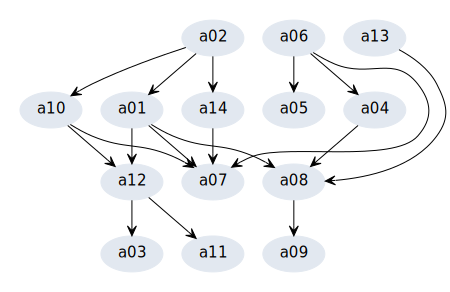

In [24]:
from hassediagram.hasse_diagram import hasse_graphviz
hasse_graphviz(df_relations_pca.values, df.index)